# Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 30)

In [2]:
df = pd.read_csv('./Cardiovascular Disease/Cardiovascular Data.csv')

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [3]:
df.shape

(308854, 19)

In [4]:
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,"""32.66""",NaN,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,NaN,No,No,No,Yes,No,Female,70-74,165.0,"""77.11""",NaN,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,"""88.45""",33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,"""93.44""",28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,"""88.45""",24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [6]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                      object
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
BMI,215402.0,28.634096,6.529573,12.05,24.21,27.44,31.84,98.44
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


In [8]:
df.describe(include='object').T

,count,unique,top,freq
General_Health,308854,5,Very Good,110395
Checkup,308854,5,Within the past year,239371
Exercise,308854,2,Yes,239381
Heart_Disease,305786,2,No,281060
Skin_Cancer,308854,2,No,278860
Other_Cancer,308854,2,No,278976
Depression,308854,2,No,246953
Diabetes,308854,4,No,259141
Arthritis,308854,2,No,207783
Sex,308854,2,Female,160196


In [9]:
df.isnull().sum()

General_Health                      0
Checkup                             0
Exercise                            0
Heart_Disease                    3068
Skin_Cancer                         0
Other_Cancer                        0
Depression                          0
Diabetes                            0
Arthritis                           0
Sex                                 0
Age_Category                        0
Height_(cm)                         0
Weight_(kg)                         0
BMI                             93452
Smoking_History                     0
Alcohol_Consumption                 0
Fruit_Consumption                   0
Green_Vegetables_Consumption        0
FriedPotato_Consumption             0
dtype: int64

# Step 2: Data Cleaning
- Dropping irrelevant columns and rows
- Identifying duplicated rows
- Renaming Columns
- Reordering Columns
- Removing Junk
- Categorizing Columns

In [10]:
df = df.drop(['Skin_Cancer','Other_Cancer', 'Depression', 'Diabetes', 'Arthritis'], axis=1)
df.head(1)

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,Female,70-74,150.0,"""32.66""",NaN,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,NaN,Female,70-74,165.0,"""77.11""",NaN,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,Female,60-64,163.0,"""88.45""",33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,Male,75-79,180.0,"""93.44""",28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,Male,80+,191.0,"""88.45""",24.37,Yes,0.0,8.0,4.0,0.0


#### `Dropping rows where Heart Disease is null`

In [38]:
df.dropna(subset=['Heart_Disease'],inplace=True)

#### `Identifying Duplicate rows and removing them`

In [11]:
df.loc[df.duplicated()].head()

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
24667,Good,Within the past year,Yes,No,Female,80+,157.0,"""81.65""",NaN,Yes,0.0,30.0,8.0,0.0
39900,Very Good,Within the past year,Yes,No,Female,70-74,160.0,"""63.5""",24.80,No,0.0,4.0,30.0,0.0
46790,Very Good,Within the past year,Yes,No,Female,50-54,155.0,"""56.7""",NaN,Yes,0.0,30.0,16.0,8.0
49287,Very Good,Within the past year,Yes,No,Female,35-39,160.0,"""72.57""",28.34,Yes,0.0,60.0,30.0,4.0
50981,Very Good,Within the past year,Yes,No,Female,18-24,157.0,"""52.16""",21.03,No,0.0,12.0,8.0,12.0


In [40]:
df.drop_duplicates()
df.head(1)

,General_Health,Checkup,Exercise,Sex,Age_Category,Height(cm),Weight(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Vegetables_Consumption,Fried_Food_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,Female,70-74,150.0,32.66,14.52,Yes,0.0,30.0,16.0,12.0,No


#### `Reset index after dropping rows`

In [20]:
df.reset_index(drop=True,inplace=True)

#### `Renaming columns`

In [12]:
df = df.rename(columns={'Height_(cm)':'Height(cm)',
                   'Weight_(kg)':'Weight(kg)',
                   'Green_Vegetables_Consumption':'Vegetables_Consumption',
                   'FriedPotato_Consumption':'Fried_Food_Consumption'})

#### `Moving Heart Disease column to the end`

In [13]:
heart_disease_col = df['Heart_Disease']
df.pop('Heart_Disease')
df['Heart_Disease'] = heart_disease_col
df.head(1)

,General_Health,Checkup,Exercise,Sex,Age_Category,Height(cm),Weight(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Vegetables_Consumption,Fried_Food_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,Female,70-74,150.0,"""32.66""",NaN,Yes,0.0,30.0,16.0,12.0,No


#### `Removing Unnecessary Junk Values in Columns`

In [24]:
df['Weight(kg)'] = df['Weight(kg)'].str.strip('"')
df['Weight(kg)'] = df['Weight(kg)'].astype('float64')

In [27]:
df['Age_Category'] = df['Age_Category'].str.replace('_','',)
df['Age_Category'] = df['Age_Category'].str.replace('/','',)
df['Age_Category'].value_counts()

65-69    33083
60-64    32112
70-74    30799
55-59    27784
50-54    24846
80+      22041
40-44    21371
45-49    20737
75-79    20505
35-39    20412
18-24    18486
30-34    18258
25-29    15352
Name: Age_Category, dtype: int64

#### `Filling null values `
- Creating a new column with lambda
- Replacing it with old column

In [29]:
df['New_BMI'] = df.apply(lambda x:x['Weight(kg)']/(x['Height(cm)']/100)**2,axis=1)
df['New_BMI'] = df['New_BMI'].round(2)
df['BMI'] = df['New_BMI']
df.drop('New_BMI',axis=1,inplace=True)
df.head()

,General_Health,Checkup,Exercise,Sex,Age_Category,Height(cm),Weight(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Vegetables_Consumption,Fried_Food_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,Female,70-74,150.0,32.66,14.52,Yes,0.0,30.0,16.0,12.0,No
1,Very Good,Within the past year,Yes,Female,60-64,163.0,88.45,33.29,No,4.0,12.0,3.0,16.0,No
2,Poor,Within the past year,Yes,Male,75-79,180.0,93.44,28.84,No,0.0,30.0,30.0,8.0,Yes
3,Good,Within the past year,No,Male,80+,191.0,88.45,24.25,Yes,0.0,8.0,4.0,0.0,No
4,Good,Within the past year,No,Male,60-64,183.0,154.22,46.05,No,0.0,12.0,12.0,12.0,No


In [30]:
df.isnull().sum()

General_Health            0
Checkup                   0
Exercise                  0
Sex                       0
Age_Category              0
Height(cm)                0
Weight(kg)                0
BMI                       0
Smoking_History           0
Alcohol_Consumption       0
Fruit_Consumption         0
Vegetables_Consumption    0
Fried_Food_Consumption    0
Heart_Disease             0
dtype: int64

In [31]:
print(df.columns.values)

['General_Health' 'Checkup' 'Exercise' 'Sex' 'Age_Category' 'Height(cm)'
 'Weight(kg)' 'BMI' 'Smoking_History' 'Alcohol_Consumption'
 'Fruit_Consumption' 'Vegetables_Consumption' 'Fried_Food_Consumption'
 'Heart_Disease']


#### `Categorizing Columns`

In [32]:
cat_cols = []
num_cols = []
for (col_name, col_dtype) in df.dtypes.items():
    if col_dtype=='object':
        cat_cols.append(col_name)
    else:
        num_cols.append(col_name)

# Step 3: Feature Understanding

- Plotting Feature Distributions
    - Pie Chart
    - Countplot
    - Histogram
    - KDE
    - Boxplot

#### `Understanding Heart Disease distribution`

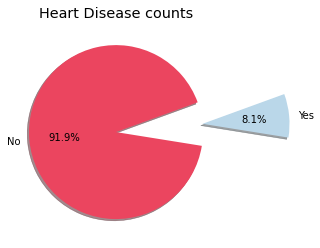

In [33]:
plt.figure(figsize=(4,4))
plt.pie(df['Heart_Disease'].value_counts(),
        labels=df['Heart_Disease'].value_counts().index,
        rotatelabels=False, 
        autopct='%1.1f%%',
        colors=['#EB455F','#BAD7E9'],
        shadow=True, 
        startangle=20,
        explode=(0,1))
plt.title('Heart Disease counts')
plt.show()

#### `Using Group by on multiple columns`

In [91]:
df.groupby(['Exercise','Sex','Heart_Disease'])['Heart_Disease'].count()

Exercise  Sex     Heart_Disease
No        Female  No                35203
                  Yes                4234
          Male    No                24636
                  Yes                4679
Yes       Female  No               113562
                  Yes                5564
          Male    No               107659
                  Yes               10249
Name: Heart_Disease, dtype: int64

#### `Creating a df for overweight BMI `

In [95]:
overweight_df = df.loc[(df['Heart_Disease'] == 'Yes') & (df['BMI'] > 25)]

#### `Plotting Age Category in ascending order by count`

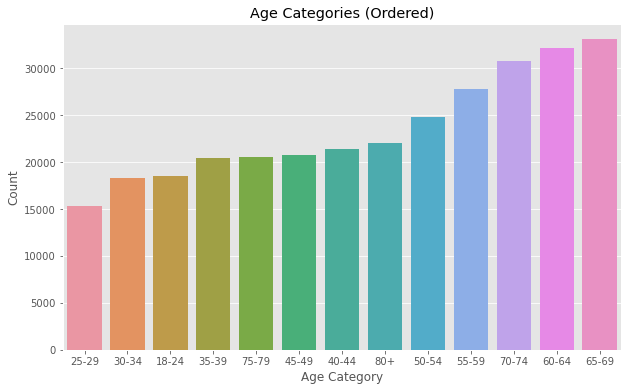

In [55]:
# Calculate the counts for each category in 'Age_Category'
age_category_counts = df['Age_Category'].value_counts()

# Get the ordered list of 'Age_Category' based on the counts in ascending order
ordered_categories = age_category_counts.index.tolist()[::-1]

# Create the count plot with the specified order
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Category', order=ordered_categories)
plt.title('Age Categories (Ordered)')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()


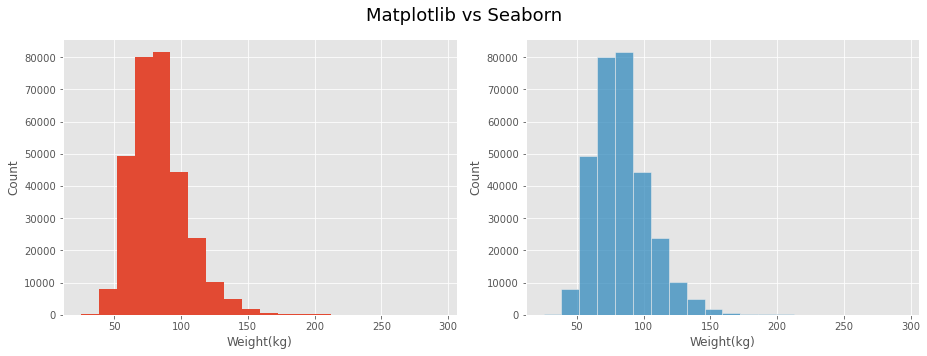

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
# Plot 1 - Matplotlib histogram
df['Weight(kg)'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_xlabel('Weight(kg)')
axes[0].set_ylabel('Count')

# Plot 2 - Seaborn histogram with KDE
sns.histplot(data=df, x='Weight(kg)', bins=20, kde=False, ax=axes[1])
axes[1].set_xlabel('Weight(kg)')
axes[1].set_ylabel('Count')

# Set a central title for the entire Figure
fig.suptitle('Matplotlib vs Seaborn', fontsize=18)
plt.tight_layout()
plt.show()

#### `Age Category Counts`

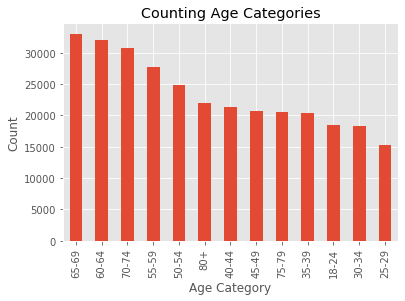

In [35]:
df['Age_Category'].value_counts().plot(kind='bar', title='Counting Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

#### `BMI KDE Distribution`

Text(0.5, 0, 'BMI')

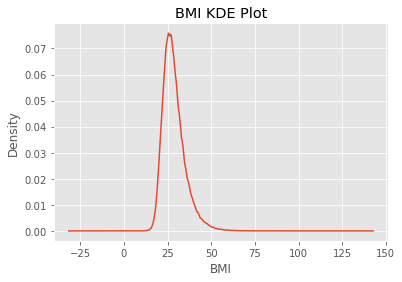

In [36]:
df['BMI'].plot(kind='kde', title='BMI KDE Plot')
plt.xlabel('BMI')

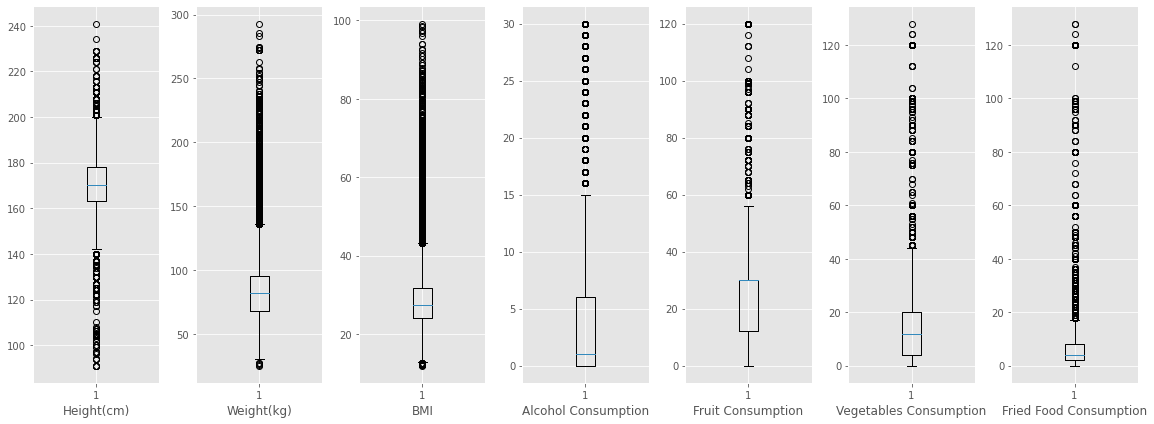

In [70]:
fig, axes = plt.subplots(1,7, figsize=(16, 6))

# Box plot for each numerical column
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col])
    axes[i].set_xlabel(col.replace('_',' '))

plt.tight_layout()
plt.show()

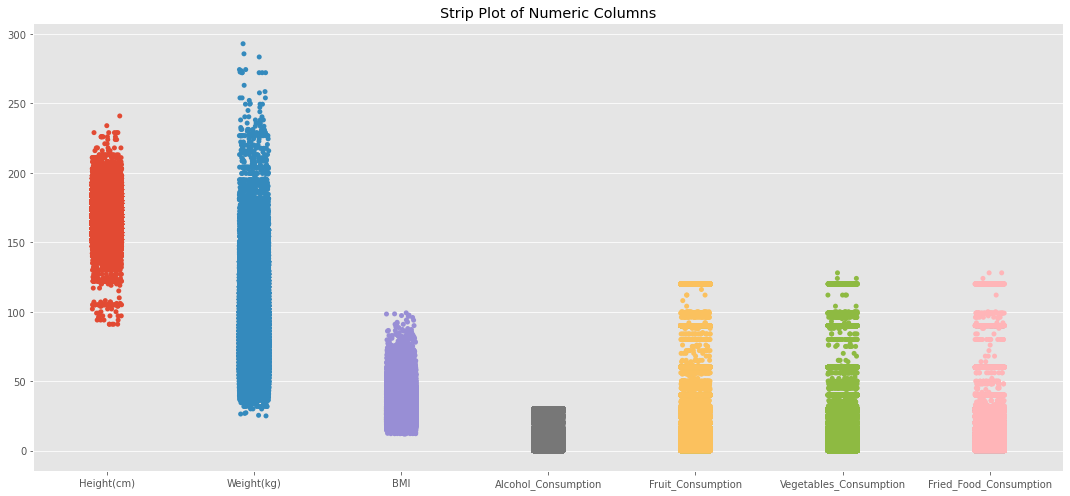

In [80]:
# Example for two numerical columns 'Alcohol_Consumption' and 'Fruit_Consumption'
plt.figure(figsize=(15,7))
sns.stripplot(data=df[num_cols], jitter=True)
plt.title('Strip Plot of Numeric Columns')
plt.tight_layout()
plt.show()

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

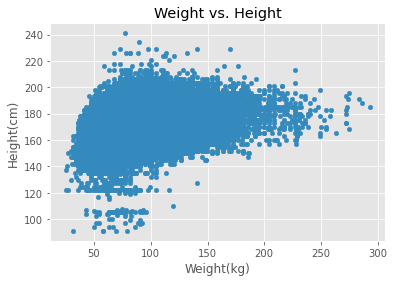

In [19]:
df.plot(kind='scatter', x='Weight(kg)', y='Height(cm)',title='Weight vs. Height')
plt.show()

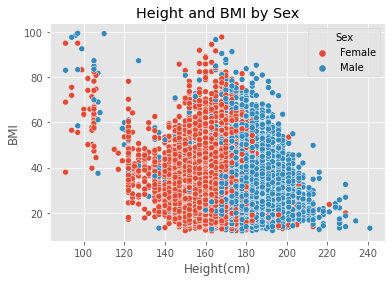

In [20]:
ax = sns.scatterplot(x='Height(cm)',y='BMI',hue='Sex',data=df)
ax.set_title('Height and BMI by Sex')
plt.show()

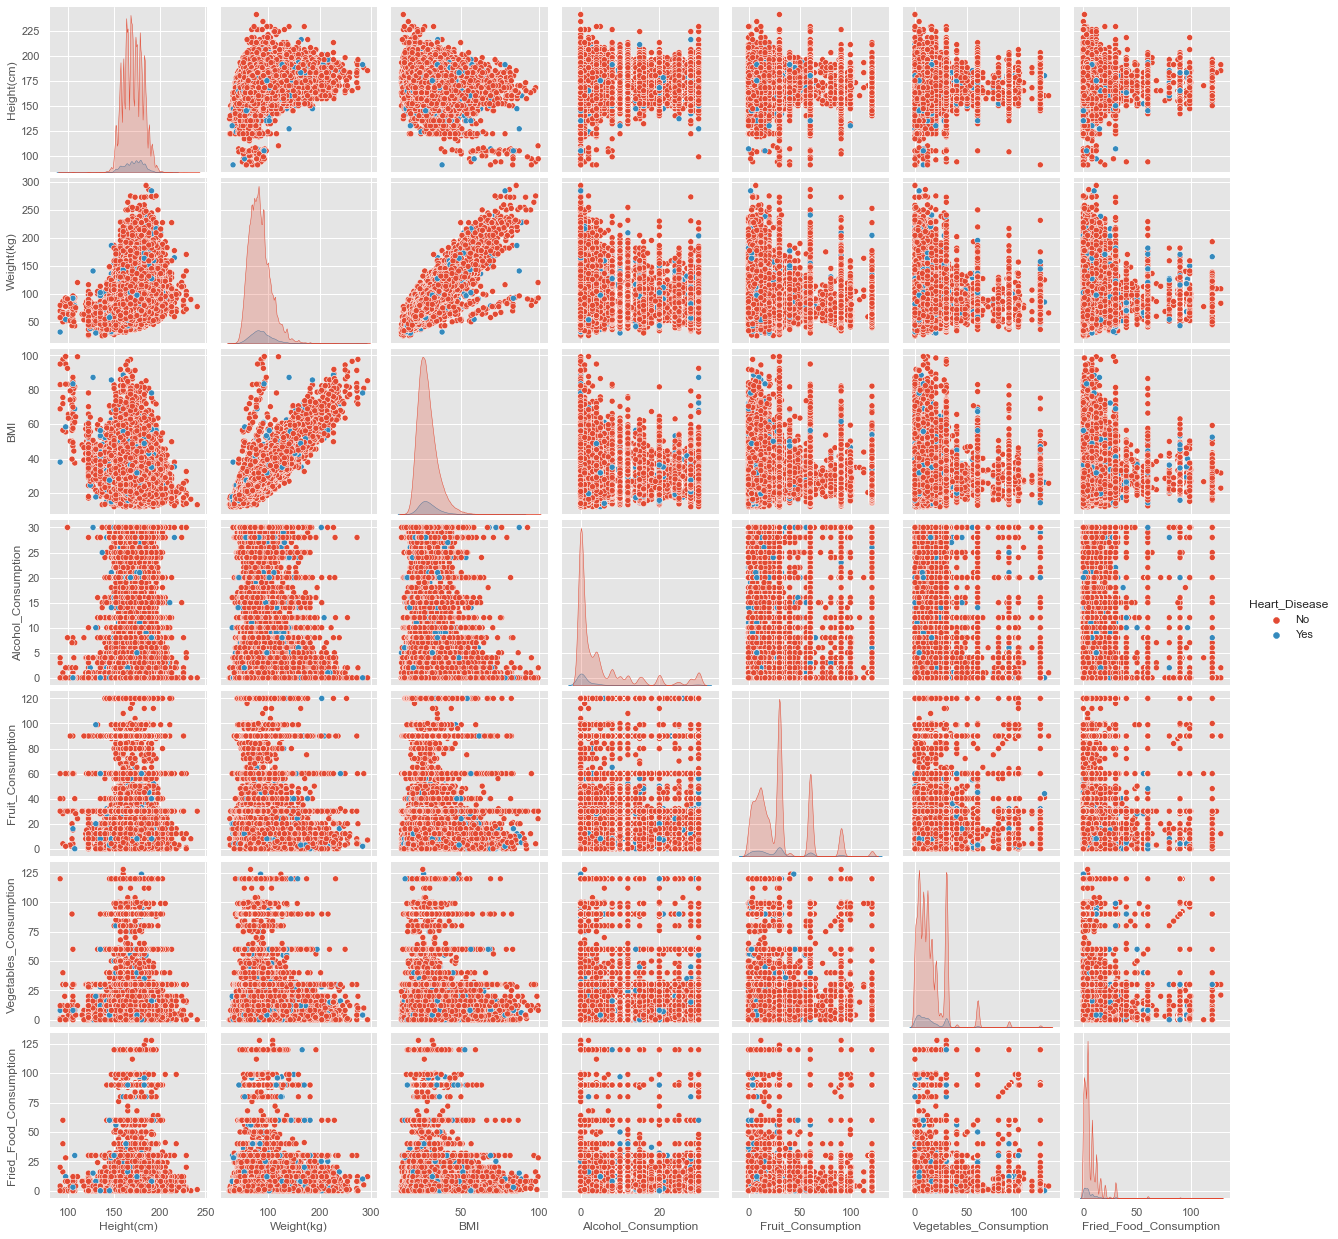

In [84]:
sns.pairplot(df,vars=num_cols,hue='Heart_Disease')
plt.show()

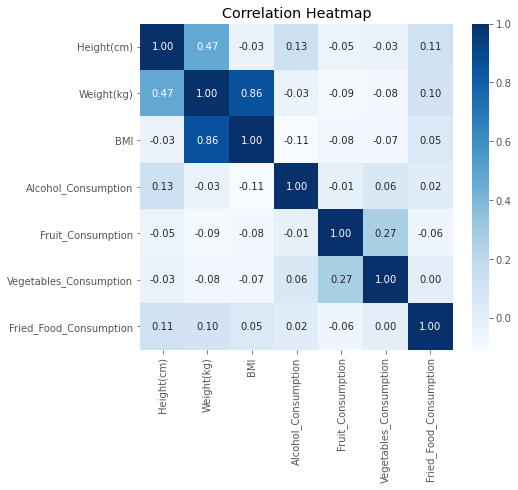

In [27]:
plt.figure(figsize=(7,6))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), annot=True,fmt = ".2f",cmap='Blues')
plt.show()

# Step 5: Asking Questions on the Data.


### `Does General Health predict Heart Disease?`


<Figure size 720x576 with 0 Axes>

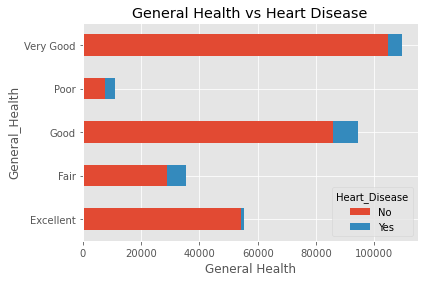

In [118]:
plt.figure(figsize=(10, 8))
plot_data = df.groupby('General_Health')['Heart_Disease'].value_counts().unstack()
plot_data.plot(kind='barh', stacked=True)
plt.title('General Health vs Heart Disease')
plt.xlabel('General Health')
plt.show()

### `How are the average values spread across genders and heart disease?`

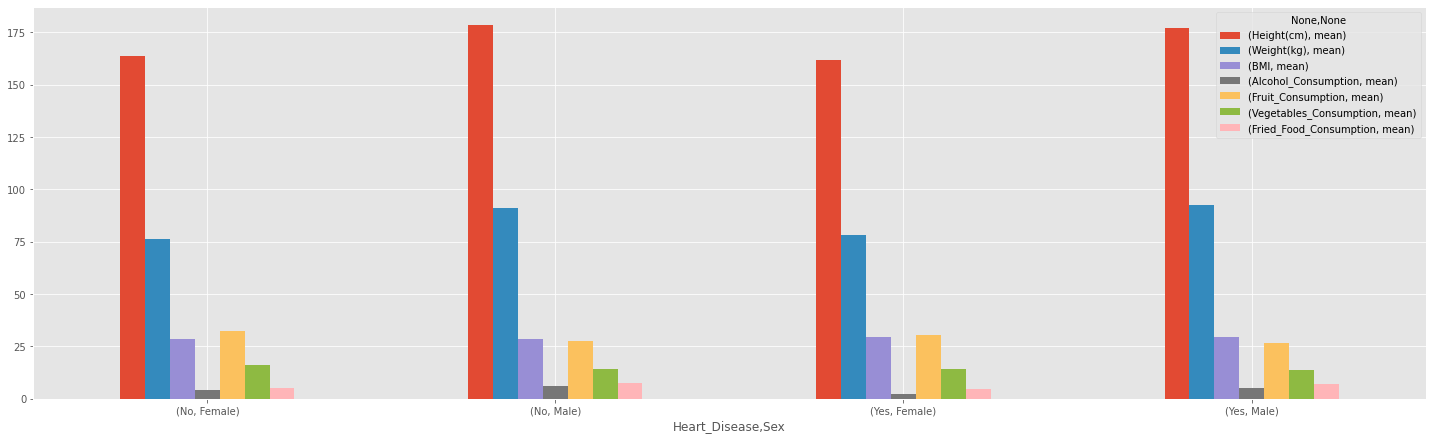

In [112]:
res = df.groupby(['Heart_Disease','Sex']).agg(['mean'])
res.plot(kind='bar', figsize=(20, 7))
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

### `How does Weight and BMI play a role?`

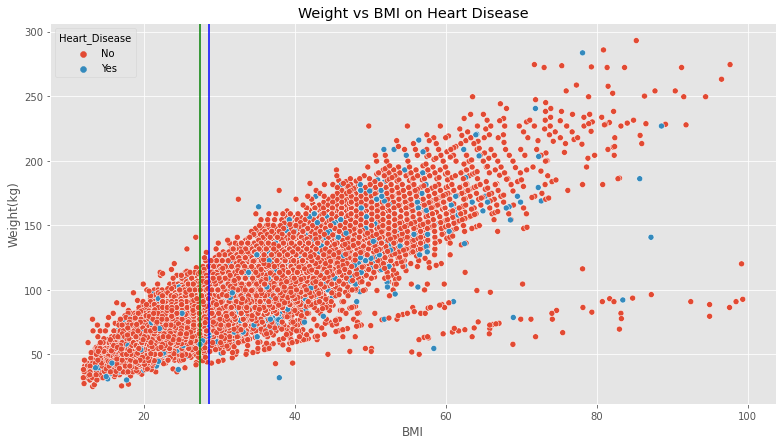

In [40]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=df, x='BMI', y='Weight(kg)', hue='Heart_Disease')
plt.axvline(df['BMI'].median(), color='green', label='Median BMI')
plt.axvline(df['BMI'].mean(), color='blue', label='Mean BMI')
plt.title('Weight vs BMI on Heart Disease')
plt.show()

### `Does Alcohol play a role in heart disease between genders`

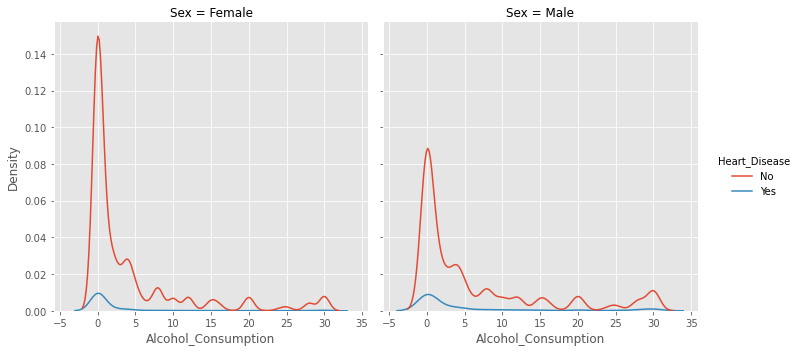

In [152]:
sns.displot(data=df, x="Alcohol_Consumption", hue="Heart_Disease", col="Sex", kind="kde")
plt.show()

### `Does Exercise have an impact on Heart Disease`

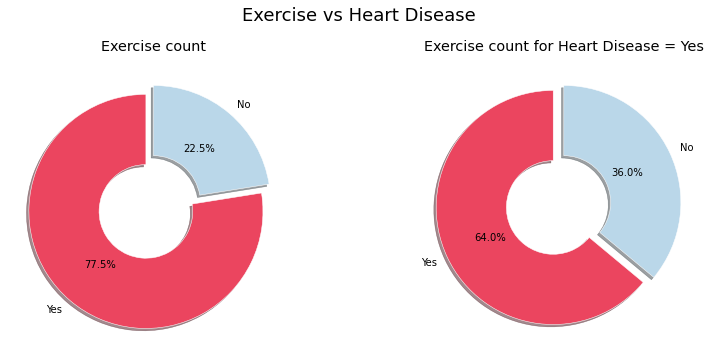

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1 - Donut chart for Exercise
wedges1, texts1, autotexts1 = axes[0].pie(df['Exercise'].value_counts(),
                                          labels=df['Exercise'].value_counts().index,
                                          rotatelabels=False,
                                          autopct='%1.1f%%',
                                          colors=['#EB455F', '#BAD7E9'],
                                          shadow=True,
                                          startangle=90,
                                          explode=(0.1, 0),
                                          wedgeprops=dict(width=0.6, edgecolor='w'))
axes[0].set_title('Exercise count')

# Plot 2 - Donut chart for Exercise with 'Heart_Disease' == 'Yes'
wedges2, texts2, autotexts2 = axes[1].pie(df[df['Heart_Disease'] == 'Yes']['Exercise'].value_counts(),
                                          labels=df[df['Heart_Disease'] == 'Yes']['Exercise'].value_counts().index,
                                          rotatelabels=False,
                                          autopct='%1.1f%%',
                                          colors=['#EB455F', '#BAD7E9'],
                                          shadow=True,
                                          startangle=90,
                                          explode=(0.1, 0),
                                          wedgeprops=dict(width=0.6, edgecolor='w'))

axes[1].set_title('Exercise count for Heart Disease = Yes')

# Set a central title for the entire Figure
fig.suptitle('Exercise vs Heart Disease', fontsize=18)

plt.tight_layout()
plt.show()
